In [1]:
#!rm -rf /kaggle/working/*

In [2]:
%cd ~
%cd /kaggle/working/
!git clone https://github.com/apdhar/fork_dcn_yolo

/root
/kaggle/working
Cloning into 'fork_dcn_yolo'...
remote: Enumerating objects: 2056, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 2056 (delta 62), reused 2 (delta 2), pack-reused 1973 (from 2)
Receiving objects: 100% (2056/2056), 2.14 MiB | 10.35 MiB/s, done.
Resolving deltas: 100% (1167/1167), done.


In [3]:
%cd /kaggle/working/fork_dcn_yolo
!pip install -e .

/kaggle/working/fork_dcn_yolo
Obtaining file:///kaggle/working/fork_dcn_yolo
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.57-0.editable-py3-none-any.whl size=22711 sha256=e25e7089dc0e7348cee4f76f4c7651156e83330e1ee311a1d7f36be5e6ebbeb6
  Stored in directory: /tmp/pip-ephem-wheel-cache-5tie4i_g/wheels/d7/63/d5/a36ceee32bd8e0ed002359f27222221cf330666da6fafcf101
Successfully built ultralytics


In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6096.0/8062.4 GB disk)


In [5]:
#yolov8-c2f_attention.yaml

In [6]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("/kaggle/working/fork_dcn_yolo/ultralytics/cfg/models/v8/yolov8n-seg.yaml")

# Train the model
model.train(
    data='/kaggle/input/foodds-final/Dataset/data.yaml',
    imgsz=640,
    epochs=125,
    batch=32,
    optimizer="AdamW",
    lr0=0.001,
    pretrained=True,
    val=True,
    save=True,
    save_dir='/kaggle/working')

New https://pypi.org/project/ultralytics/8.3.65 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=segment, mode=train, model=/kaggle/working/fork_dcn_yolo/ultralytics/cfg/models/v8/yolov8n-seg.yaml, data=/kaggle/input/foodds-final/Dataset/data.yaml, epochs=125, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fa

100%|██████████| 755k/755k [00:00<00:00, 26.7MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 99.8MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/foodds-final/Dataset/train/labels... 3146 images, 6 backgrounds, 0 corrupt: 100%|██████████| 3146/3146 [00:18<00:00, 173.99it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/foodds-final/Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/foodds-final/Dataset/valid/labels... 370 images, 1 backgrounds, 0 corrupt: 100%|██████████| 370/370 [00:02<00:00, 146.57it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/foodds-final/Dataset/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/fork_dcn_yolo/runs/segment/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/fork_dcn_yolo/runs/segment/train
Starting training for 125 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/125      8.51G      3.012      4.486      3.911      3.271         39        640: 100%|██████████| 99/99 [00:54<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        370       1146     0.0333     0.0529     0.0192    0.00699     0.0143     0.0452    0.00817    0.00207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/125      8.45G      2.109      3.073      2.845      2.335         52        640: 100%|██████████| 99/99 [00:51<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all        370       1146       0.21      0.221      0.162     0.0835      0.214      0.224      0.163     0.0876



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/125      8.47G       1.71      2.862      2.471      1.979         36        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        370       1146      0.255      0.419      0.267      0.164      0.254      0.364      0.237      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/125      8.47G      1.478      2.695      2.198       1.76         58        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        370       1146      0.402      0.507      0.407      0.265      0.401      0.441      0.374      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/125      8.47G      1.341      2.571      2.004      1.633         79        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        370       1146      0.409      0.546      0.537       0.38      0.401      0.535      0.521      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/125      8.47G       1.23      2.448      1.834      1.532         41        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]

                   all        370       1146       0.55      0.618      0.607      0.452      0.533      0.573      0.566      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/125      8.47G      1.167      2.366      1.723      1.476         57        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        370       1146      0.543      0.577      0.577      0.446       0.54      0.571      0.562      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/125      8.46G       1.11      2.272       1.61      1.419         55        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        370       1146      0.702      0.647      0.712       0.54      0.673      0.602      0.662       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/125      8.46G       1.07      2.205      1.529      1.393         61        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        370       1146      0.593      0.605      0.635       0.49      0.607      0.564      0.609      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/125      8.46G      1.046       2.15      1.472      1.372         42        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        370       1146      0.503      0.633      0.664      0.495      0.491      0.616      0.634      0.461



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/125      8.47G      1.022      2.078      1.406      1.343         41        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all        370       1146      0.446       0.62      0.581      0.463      0.476      0.591      0.569      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/125      8.46G     0.9634      1.989      1.357      1.313         38        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.664      0.635      0.701      0.558       0.67      0.605      0.671      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/125      8.46G     0.9565      1.996      1.313      1.305         54        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        370       1146      0.762      0.662      0.747        0.6      0.751      0.638      0.705      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/125      8.46G     0.9324      1.882      1.265      1.279         41        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]

                   all        370       1146      0.704      0.611      0.717      0.568      0.676      0.593      0.673      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/125      8.46G      0.911      1.878      1.217      1.267         56        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        370       1146      0.689      0.726      0.785      0.647      0.685      0.704      0.763      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/125      8.46G     0.8934      1.836      1.191      1.258         52        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.745      0.764      0.806      0.672      0.716       0.72      0.759      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/125      8.46G     0.8869      1.829      1.151      1.254         34        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        370       1146      0.792      0.749      0.831      0.681      0.803      0.727       0.81      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/125      8.46G     0.8617      1.746      1.116      1.229         46        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.797      0.659      0.778      0.637      0.798      0.643      0.757      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/125      8.46G     0.8598      1.762      1.102      1.228         64        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]

                   all        370       1146      0.756      0.732      0.807      0.672      0.746      0.717      0.787      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/125      8.46G     0.8362      1.716      1.068      1.211         50        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        370       1146      0.757      0.716      0.785      0.641       0.77      0.682      0.757      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/125      8.46G     0.8306      1.727      1.067      1.213         57        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all        370       1146      0.743      0.758      0.802      0.663      0.718      0.711      0.755      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/125      8.46G     0.8233      1.682      1.024      1.199         51        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        370       1146      0.748      0.759      0.823       0.68      0.735      0.745      0.803      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/125      8.46G     0.8147       1.66      1.026      1.191         43        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        370       1146      0.796       0.76       0.84      0.704      0.798      0.708      0.802      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/125      8.46G     0.7984      1.634     0.9993      1.182         26        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        370       1146      0.784      0.819      0.863      0.717      0.774      0.799      0.842      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/125      8.46G     0.7885      1.624     0.9605      1.179         52        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        370       1146       0.86       0.74      0.847      0.711      0.868      0.723      0.828      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/125      8.46G     0.7838      1.605     0.9516      1.179         36        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        370       1146      0.797      0.775       0.86      0.725      0.787      0.765      0.841      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/125      8.46G     0.7789      1.588     0.9264      1.162         63        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        370       1146      0.808      0.752      0.852      0.725      0.803      0.746      0.829      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/125      8.45G      0.766      1.577     0.9315      1.161         49        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        370       1146      0.863      0.793      0.882      0.741      0.824      0.806      0.864      0.685



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/125      8.47G     0.7615      1.572     0.9273      1.156         50        640: 100%|██████████| 99/99 [00:49<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        370       1146      0.797      0.761      0.835      0.697      0.786      0.743       0.81      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/125      8.45G     0.7511      1.544     0.8933      1.149         83        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]

                   all        370       1146      0.808      0.761      0.831      0.709      0.796      0.753      0.813      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/125      8.46G      0.767      1.582      0.903      1.156         63        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        370       1146      0.826      0.822      0.883      0.754      0.822      0.814      0.869      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/125      8.45G     0.7412      1.518     0.8723       1.14         66        640: 100%|██████████| 99/99 [00:51<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        370       1146      0.825      0.819      0.866      0.734       0.81      0.805      0.848      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/125      8.46G     0.7438       1.54     0.8585      1.144         60        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        370       1146      0.837      0.773      0.859       0.73      0.832      0.767      0.845      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/125      8.46G     0.7325      1.481     0.8555      1.134         58        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        370       1146       0.83      0.821      0.876      0.751      0.822      0.815      0.861      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/125      8.46G     0.7257      1.502     0.8501      1.129         54        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        370       1146      0.864      0.821      0.894      0.758      0.851      0.806      0.872      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/125      8.45G     0.7259      1.515     0.8417      1.129         76        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146       0.82      0.824      0.882       0.75       0.83       0.79      0.864      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/125      8.46G     0.7213      1.479     0.8243      1.122         52        640: 100%|██████████| 99/99 [00:51<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        370       1146      0.844      0.833      0.895      0.764      0.835      0.821      0.879      0.708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/125      8.45G     0.7101      1.436     0.8162      1.116         53        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        370       1146      0.853      0.807      0.884       0.76      0.842      0.796      0.863      0.708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/125      8.46G     0.7055      1.452     0.8058      1.116         66        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        370       1146      0.843      0.788      0.862      0.737      0.834      0.779      0.848       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/125      8.46G     0.6963      1.435     0.7981      1.108         59        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        370       1146      0.854      0.813      0.889      0.767      0.847      0.794      0.873      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/125      8.46G     0.7013       1.46     0.7899      1.109         52        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        370       1146       0.85      0.795      0.883      0.762      0.843       0.77      0.865      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/125      8.45G      0.694      1.437     0.7692      1.104         57        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        370       1146      0.879      0.805      0.892      0.762      0.875      0.796      0.877      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/125      8.46G     0.6918      1.415     0.7564      1.103         44        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        370       1146      0.895      0.812      0.911      0.782      0.887      0.803      0.887      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/125      8.45G     0.6753      1.391     0.7514      1.093         81        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        370       1146      0.878      0.805      0.904      0.779      0.878      0.781      0.879      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/125      8.46G     0.6745      1.364     0.7409      1.091         52        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.855      0.842      0.908      0.772      0.845      0.816      0.878      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/125      8.45G     0.6924      1.412     0.7465      1.095         43        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        370       1146      0.853      0.847      0.906      0.782      0.863      0.805      0.882      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/125      8.46G     0.6806      1.385     0.7289      1.091         47        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]

                   all        370       1146      0.861      0.824       0.91      0.782      0.854      0.817      0.899      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/125      8.45G     0.6623      1.374     0.7207      1.086         47        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all        370       1146      0.837      0.836      0.895      0.775      0.845      0.805      0.876      0.717



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/125      8.46G     0.6759      1.373     0.7306      1.087         32        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        370       1146      0.861      0.861      0.917      0.797      0.846      0.849      0.903      0.741



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/125      8.45G     0.6677      1.388     0.7284      1.089         73        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        370       1146      0.891      0.819        0.9      0.782      0.878      0.803      0.879      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/125      8.46G      0.662      1.353     0.7128      1.087         72        640: 100%|██████████| 99/99 [00:50<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        370       1146       0.91      0.853      0.931      0.811      0.903      0.847      0.917      0.754



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/125      8.45G     0.6568      1.348      0.703      1.081         51        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        370       1146      0.874       0.81      0.894      0.772      0.865      0.801      0.879      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/125      8.46G     0.6527      1.345     0.6918      1.077         56        640: 100%|██████████| 99/99 [00:51<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        370       1146      0.879      0.847      0.912      0.797      0.888      0.822      0.898      0.739



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/125      8.45G     0.6478      1.334     0.6831      1.071         41        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]

                   all        370       1146      0.867      0.848      0.912      0.785      0.861      0.834      0.891      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/125      8.46G     0.6451      1.317     0.6788      1.065         57        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        370       1146       0.89      0.852      0.925      0.805      0.883      0.834      0.905      0.746



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/125      8.45G     0.6422      1.319     0.6828      1.072         50        640: 100%|██████████| 99/99 [00:49<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.856      0.859      0.915      0.792      0.854      0.841      0.895      0.736



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/125      8.46G     0.6366      1.307     0.6629      1.064         58        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        370       1146      0.892      0.874      0.925      0.812      0.902      0.841       0.91       0.76



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/125      8.45G      0.643      1.306     0.6659      1.066         63        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.879      0.855      0.923      0.801      0.867      0.837      0.906      0.744



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/125      8.46G     0.6326      1.298     0.6558       1.06         52        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.891      0.812      0.912       0.79      0.882      0.795      0.893      0.737



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/125      8.45G     0.6156      1.257     0.6436      1.057         58        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        370       1146      0.866      0.826      0.906      0.786      0.857      0.816      0.889      0.733



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/125      8.46G     0.6284      1.298     0.6372       1.06         54        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.893      0.837       0.92      0.796      0.887      0.828      0.904      0.741



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/125      8.45G     0.6248      1.263     0.6424      1.054         64        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]

                   all        370       1146      0.882      0.873      0.926      0.808      0.878      0.858       0.91      0.757



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/125      8.46G     0.6283      1.292     0.6415      1.058         62        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        370       1146      0.895      0.843      0.911      0.795      0.888      0.835      0.898      0.746



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/125      8.45G     0.6219       1.27     0.6387      1.055         47        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146        0.9      0.836      0.918      0.801      0.888      0.821      0.901      0.748



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/125      8.46G     0.6168      1.274     0.6199      1.053         57        640: 100%|██████████| 99/99 [00:50<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        370       1146      0.913      0.866      0.929      0.815      0.902      0.856      0.913      0.754



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/125      8.45G     0.6279      1.302      0.638      1.062         66        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        370       1146      0.894      0.881      0.932      0.814       0.88      0.858      0.912      0.747



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/125      8.46G     0.6177      1.255      0.621       1.05         55        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.884      0.884      0.935      0.814      0.878      0.871      0.918      0.754



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/125      8.46G     0.6182      1.269     0.6333      1.054         93        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]

                   all        370       1146      0.891      0.876      0.935      0.819      0.897      0.846      0.913      0.757



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/125      8.46G     0.6117       1.26      0.622      1.049         60        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        370       1146       0.91      0.842      0.923      0.812        0.9      0.829      0.907      0.754



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/125      8.45G     0.6097      1.259     0.6123       1.05         68        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        370       1146        0.9      0.868      0.935      0.816      0.893      0.847      0.917      0.762



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/125      8.46G     0.6091      1.261      0.614      1.046         43        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        370       1146      0.907      0.893      0.943      0.826      0.901      0.872      0.926      0.766



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/125      8.45G     0.6017      1.237     0.6031      1.043         43        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]

                   all        370       1146      0.908      0.876      0.937      0.819      0.897      0.864      0.924      0.771



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/125      8.45G     0.5958      1.243     0.6003      1.038         79        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        370       1146      0.906      0.891      0.949      0.836      0.907      0.862      0.931      0.775



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/125      8.45G     0.6051      1.261     0.5939      1.043         28        640: 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.893      0.833      0.923      0.812      0.897      0.807      0.905      0.753



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/125      8.46G     0.5882      1.204     0.5795       1.03         73        640: 100%|██████████| 99/99 [00:49<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]

                   all        370       1146      0.902      0.861      0.926      0.818      0.901      0.844      0.913      0.758



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/125      8.45G     0.5934      1.209     0.5864      1.036         40        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        370       1146      0.922      0.872      0.939      0.823      0.914      0.858      0.926      0.767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/125      8.46G     0.6086      1.238     0.6028      1.044         51        640: 100%|██████████| 99/99 [00:49<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.903      0.869      0.933      0.814      0.885      0.846      0.912      0.755



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/125      8.45G     0.5947      1.237     0.5802      1.036         64        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        370       1146      0.909      0.891      0.941      0.829      0.915      0.863      0.924      0.771



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/125      8.46G     0.5902      1.216     0.5739       1.03         30        640: 100%|██████████| 99/99 [00:50<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        370       1146        0.9      0.893      0.945      0.829      0.893      0.881      0.928      0.771



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/125      8.46G     0.5929      1.225      0.577      1.033         41        640: 100%|██████████| 99/99 [00:50<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        370       1146       0.92      0.874      0.938      0.822      0.906      0.858      0.919       0.76



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/125      8.46G     0.5766      1.185     0.5653      1.022         71        640: 100%|██████████| 99/99 [00:50<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        370       1146      0.918      0.865      0.939      0.822      0.911      0.855      0.923       0.76



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/125      8.45G     0.5735      1.188     0.5629      1.026         65        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        370       1146      0.907      0.875      0.936      0.825      0.895      0.861      0.918      0.767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/125      8.46G     0.5799      1.185     0.5724      1.024         75        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.915      0.867      0.936      0.822      0.905      0.856      0.919      0.764



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/125      8.45G     0.5795      1.216     0.5553      1.022         64        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        370       1146      0.909      0.877       0.94      0.831      0.898      0.865      0.923      0.771



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/125      8.46G     0.5747      1.181     0.5577      1.023         71        640: 100%|██████████| 99/99 [00:51<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        370       1146      0.909      0.887       0.94      0.828      0.914      0.864      0.924      0.766



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/125      8.45G       0.57       1.16     0.5508      1.019         74        640: 100%|██████████| 99/99 [00:51<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        370       1146       0.92      0.889      0.942      0.836      0.918      0.872      0.929       0.77



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/125      8.46G      0.572      1.179     0.5503      1.021         44        640: 100%|██████████| 99/99 [00:50<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        370       1146      0.916       0.86      0.929      0.822       0.91       0.85      0.916      0.761



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/125      8.45G      0.569      1.172     0.5445      1.021         42        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        370       1146      0.931      0.884      0.941       0.83      0.922      0.864      0.926      0.774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/125      8.46G      0.567      1.166     0.5419      1.018         62        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        370       1146      0.914      0.873      0.932       0.83      0.904      0.858      0.917      0.769



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/125      8.45G     0.5595      1.147     0.5428      1.016         76        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        370       1146      0.895      0.883      0.936      0.828      0.885      0.869      0.919      0.768



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/125      8.46G     0.5556      1.138     0.5435      1.013         44        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        370       1146      0.886       0.89      0.933      0.829      0.916      0.851      0.919      0.769



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/125      8.45G     0.5724      1.166     0.5384      1.018         64        640: 100%|██████████| 99/99 [00:51<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]

                   all        370       1146      0.912       0.88      0.941      0.835      0.911      0.861      0.929      0.773



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/125      8.46G     0.5597      1.157     0.5286      1.015         54        640: 100%|██████████| 99/99 [00:51<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        370       1146      0.904      0.889      0.943      0.836       0.89      0.875      0.925      0.775



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/125      8.45G     0.5543      1.134     0.5306      1.011         57        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        370       1146       0.92      0.879      0.943      0.837      0.915      0.868      0.934      0.777



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/125      8.46G     0.5597      1.151     0.5294      1.014         49        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        370       1146      0.909      0.901      0.941      0.834      0.898      0.884      0.925      0.773



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/125      8.45G     0.5499      1.147     0.5202      1.011         62        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        370       1146      0.908      0.875      0.938       0.83        0.9      0.862      0.926       0.77



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/125      8.46G     0.5617       1.17     0.5361      1.016         45        640: 100%|██████████| 99/99 [00:50<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.58it/s]

                   all        370       1146      0.917      0.894      0.943      0.837       0.91      0.882      0.932      0.778



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/125      8.45G     0.5616       1.16     0.5261      1.012         74        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        370       1146      0.934      0.884       0.95      0.843      0.923      0.872      0.936      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/125      8.45G     0.5441      1.107      0.511      1.005         69        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        370       1146      0.922      0.873      0.942      0.834      0.914      0.861      0.924      0.777



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/125      8.46G     0.5586      1.157     0.5224       1.01         46        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        370       1146      0.923      0.892      0.946      0.842      0.907      0.876      0.931      0.779



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/125      8.46G     0.5484      1.125      0.516      1.007         78        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.934      0.885      0.948      0.838      0.924      0.874      0.934      0.782



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/125      8.45G     0.5394      1.108     0.5145     0.9991         63        640: 100%|██████████| 99/99 [00:51<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        370       1146      0.909      0.896      0.947      0.843      0.918      0.867       0.93       0.78



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/125      8.46G       0.55       1.14     0.5116       1.01         65        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        370       1146      0.925      0.883      0.943      0.836      0.913      0.868      0.928      0.777



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/125      8.45G     0.5386      1.125     0.4962      1.002         63        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        370       1146      0.922      0.896      0.944      0.837      0.912      0.881       0.93       0.78



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/125      8.46G     0.5394      1.111     0.4983      1.005         38        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        370       1146      0.925      0.889      0.947      0.839      0.914      0.875      0.935      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/125      8.45G     0.5333      1.092     0.4994      0.997         48        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        370       1146      0.924      0.884      0.946      0.837      0.917      0.867      0.931      0.783



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/125      8.46G     0.5441      1.113     0.5052      1.005         39        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        370       1146      0.906      0.898      0.948      0.842      0.915       0.87      0.934      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/125      8.45G     0.5263      1.076     0.4845     0.9939         48        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        370       1146       0.92      0.886      0.946       0.84      0.913      0.878      0.934      0.782



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/125      8.46G     0.5361      1.128     0.4962      1.002         52        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        370       1146      0.916       0.89      0.942      0.838      0.907       0.88      0.931       0.78



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/125      8.45G     0.5153      1.071     0.4885     0.9884         24        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]

                   all        370       1146      0.918      0.901      0.948      0.842      0.917       0.88      0.931       0.78



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/125      8.46G     0.5248       1.08      0.483     0.9928         71        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        370       1146      0.913      0.897      0.946      0.841       0.91      0.888      0.936      0.783



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/125      8.45G     0.5449      1.131     0.4998       1.01        115        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]

                   all        370       1146      0.914      0.899      0.947      0.843      0.932      0.863      0.933      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/125      8.46G     0.5329      1.088     0.4898     0.9981         50        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.922      0.888       0.95      0.844      0.924      0.875      0.941      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/125      8.45G     0.5325       1.11     0.4795     0.9985         54        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        370       1146      0.925      0.886       0.95      0.847      0.923      0.874      0.939       0.79



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/125      8.46G     0.5199      1.066     0.4699     0.9898         46        640: 100%|██████████| 99/99 [00:50<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        370       1146      0.918      0.886      0.948      0.843      0.913      0.875      0.933      0.785


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/125      8.47G     0.4371      0.998     0.3428      0.931         28        640: 100%|██████████| 99/99 [00:50<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all        370       1146      0.906      0.892      0.942      0.837      0.899      0.884      0.932      0.783



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/125      8.46G     0.4326     0.9673     0.3306     0.9285         24        640: 100%|██████████| 99/99 [00:48<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]

                   all        370       1146      0.917      0.896      0.945      0.841      0.915      0.882      0.932      0.786



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/125      8.47G     0.4253     0.9631     0.3227     0.9271         38        640: 100%|██████████| 99/99 [00:48<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]

                   all        370       1146      0.908      0.908      0.947      0.843      0.908      0.878      0.931      0.788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/125      8.47G     0.4244     0.9593     0.3233     0.9246         35        640: 100%|██████████| 99/99 [00:48<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        370       1146      0.931      0.875      0.944      0.844       0.92      0.863      0.931      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/125      8.47G     0.4236      0.952     0.3205     0.9227         26        640: 100%|██████████| 99/99 [00:48<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        370       1146      0.918       0.89      0.948      0.845      0.909      0.881      0.932       0.79



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/125      8.47G     0.4181     0.9481     0.3166     0.9219         36        640: 100%|██████████| 99/99 [00:48<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]

                   all        370       1146      0.932      0.887      0.947      0.845      0.922      0.877      0.932       0.79



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/125      8.47G     0.4132     0.9377     0.3086      0.918         26        640: 100%|██████████| 99/99 [00:48<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        370       1146      0.924      0.881      0.944      0.844      0.914      0.869      0.929       0.79



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/125      8.47G     0.4149     0.9317      0.312     0.9197         15        640: 100%|██████████| 99/99 [00:48<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        370       1146      0.934      0.883      0.947      0.845      0.921      0.873      0.933      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/125      8.47G     0.4124      0.934     0.3093     0.9203         41        640: 100%|██████████| 99/99 [00:48<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        370       1146      0.934      0.882      0.947      0.845       0.92       0.87      0.931      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/125      8.47G      0.412     0.9334     0.3082     0.9179         39        640: 100%|██████████| 99/99 [00:48<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        370       1146      0.935      0.881      0.947      0.846      0.924      0.869      0.933      0.793



125 epochs completed in 1.897 hours.
Optimizer stripped from /kaggle/working/fork_dcn_yolo/runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from /kaggle/working/fork_dcn_yolo/runs/segment/train/weights/best.pt, 6.8MB

Validating /kaggle/working/fork_dcn_yolo/runs/segment/train/weights/best.pt...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,259,234 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]


                   all        370       1146      0.935       0.88      0.947      0.846      0.923       0.87      0.933      0.793
                Beguni         60        207      0.924      0.765      0.886      0.748      0.901      0.745      0.858      0.686
                  Coin         65        162      0.995          1      0.995      0.966      0.995          1      0.995      0.939
                 Peaju         51        271      0.942      0.835      0.929      0.761      0.938      0.831      0.928      0.725
                  Puri         62        149      0.912       0.96      0.977       0.94        0.9      0.946      0.961      0.889
               Singara         69        172      0.956      0.826      0.966      0.889      0.956      0.826      0.966      0.831
                Somusa         63        185      0.878      0.898      0.928       0.77      0.852       0.87      0.888      0.686
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 2.6ms postproce

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a693ca21480>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

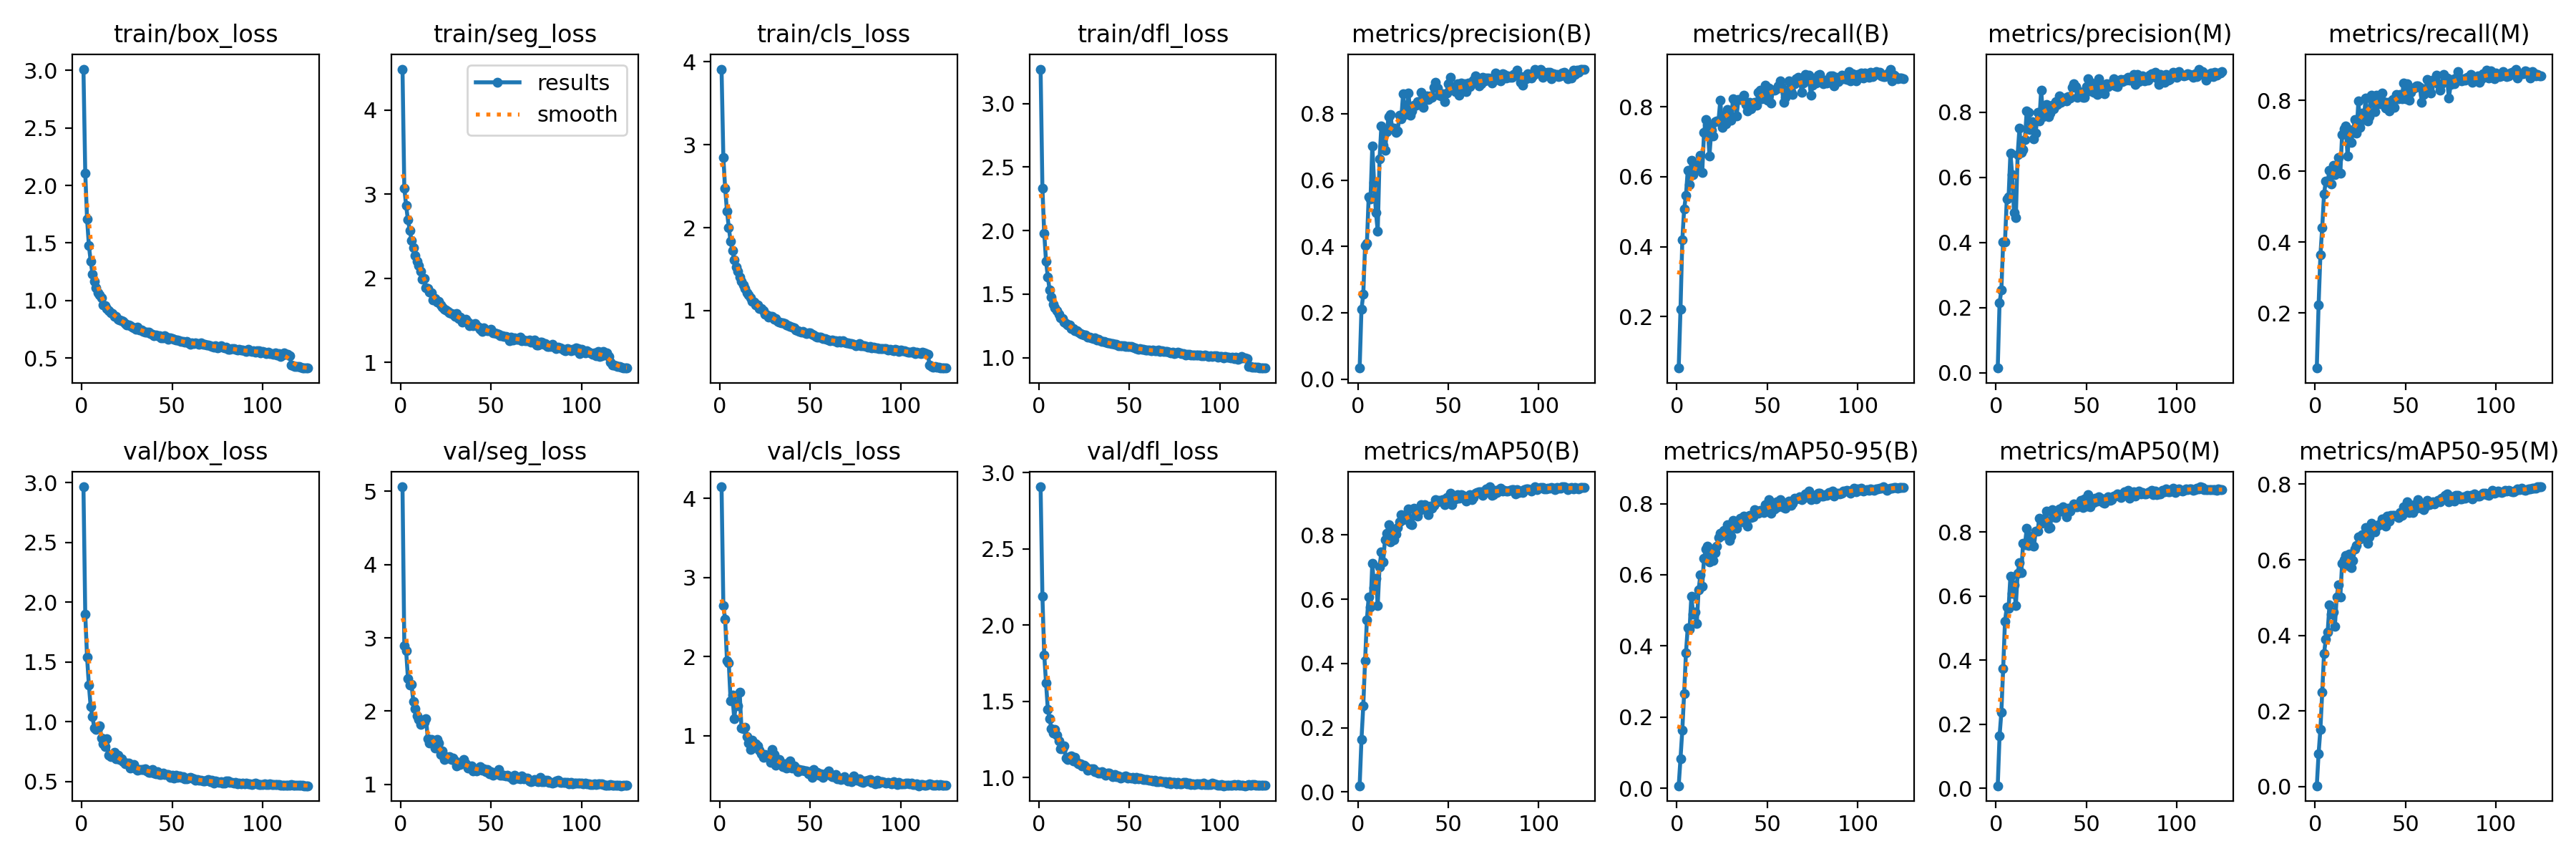

In [7]:
from IPython.display import display, Image
Image(filename=f'/kaggle/working/fork_dcn_yolo/runs/segment/train/results.png',height=500,width=1000)

In [8]:
# Load the trained YOLOv8 segmentation model
model = YOLO('/kaggle/working/fork_dcn_yolo/runs/segment/train/weights/best.pt')  # Path to your best model after training

# Perform testing on the test dataset
results = model.val(
    data='/kaggle/input/foodds-final/Dataset/data.yaml',
    split='test',
    imgsz=640,
    conf=0.5,
    save=True,
    save_dir='/kaggle/working')

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,259,234 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /kaggle/input/foodds-final/Dataset/test/labels... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:02<00:00, 179.87it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/foodds-final/Dataset/test is not writeable, cache not saved.



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]


                   all        369       1104      0.935      0.892      0.931      0.862      0.917      0.874      0.916      0.811
                Beguni         60        203      0.871      0.798      0.865      0.778      0.813      0.744      0.822      0.698
                  Coin         67        161      0.988      0.988      0.993      0.966      0.988      0.988      0.993      0.934
                 Peaju         52        287      0.898      0.826      0.877       0.74        0.9      0.826      0.872      0.705
                  Puri         61        144      0.963      0.903      0.949      0.933      0.941      0.882      0.933      0.867
               Singara         67        136      0.946      0.904      0.944      0.888      0.952      0.904      0.944      0.856
                Somusa         63        173      0.942      0.936      0.959      0.866      0.907      0.902      0.932      0.807
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 1.7ms postproce

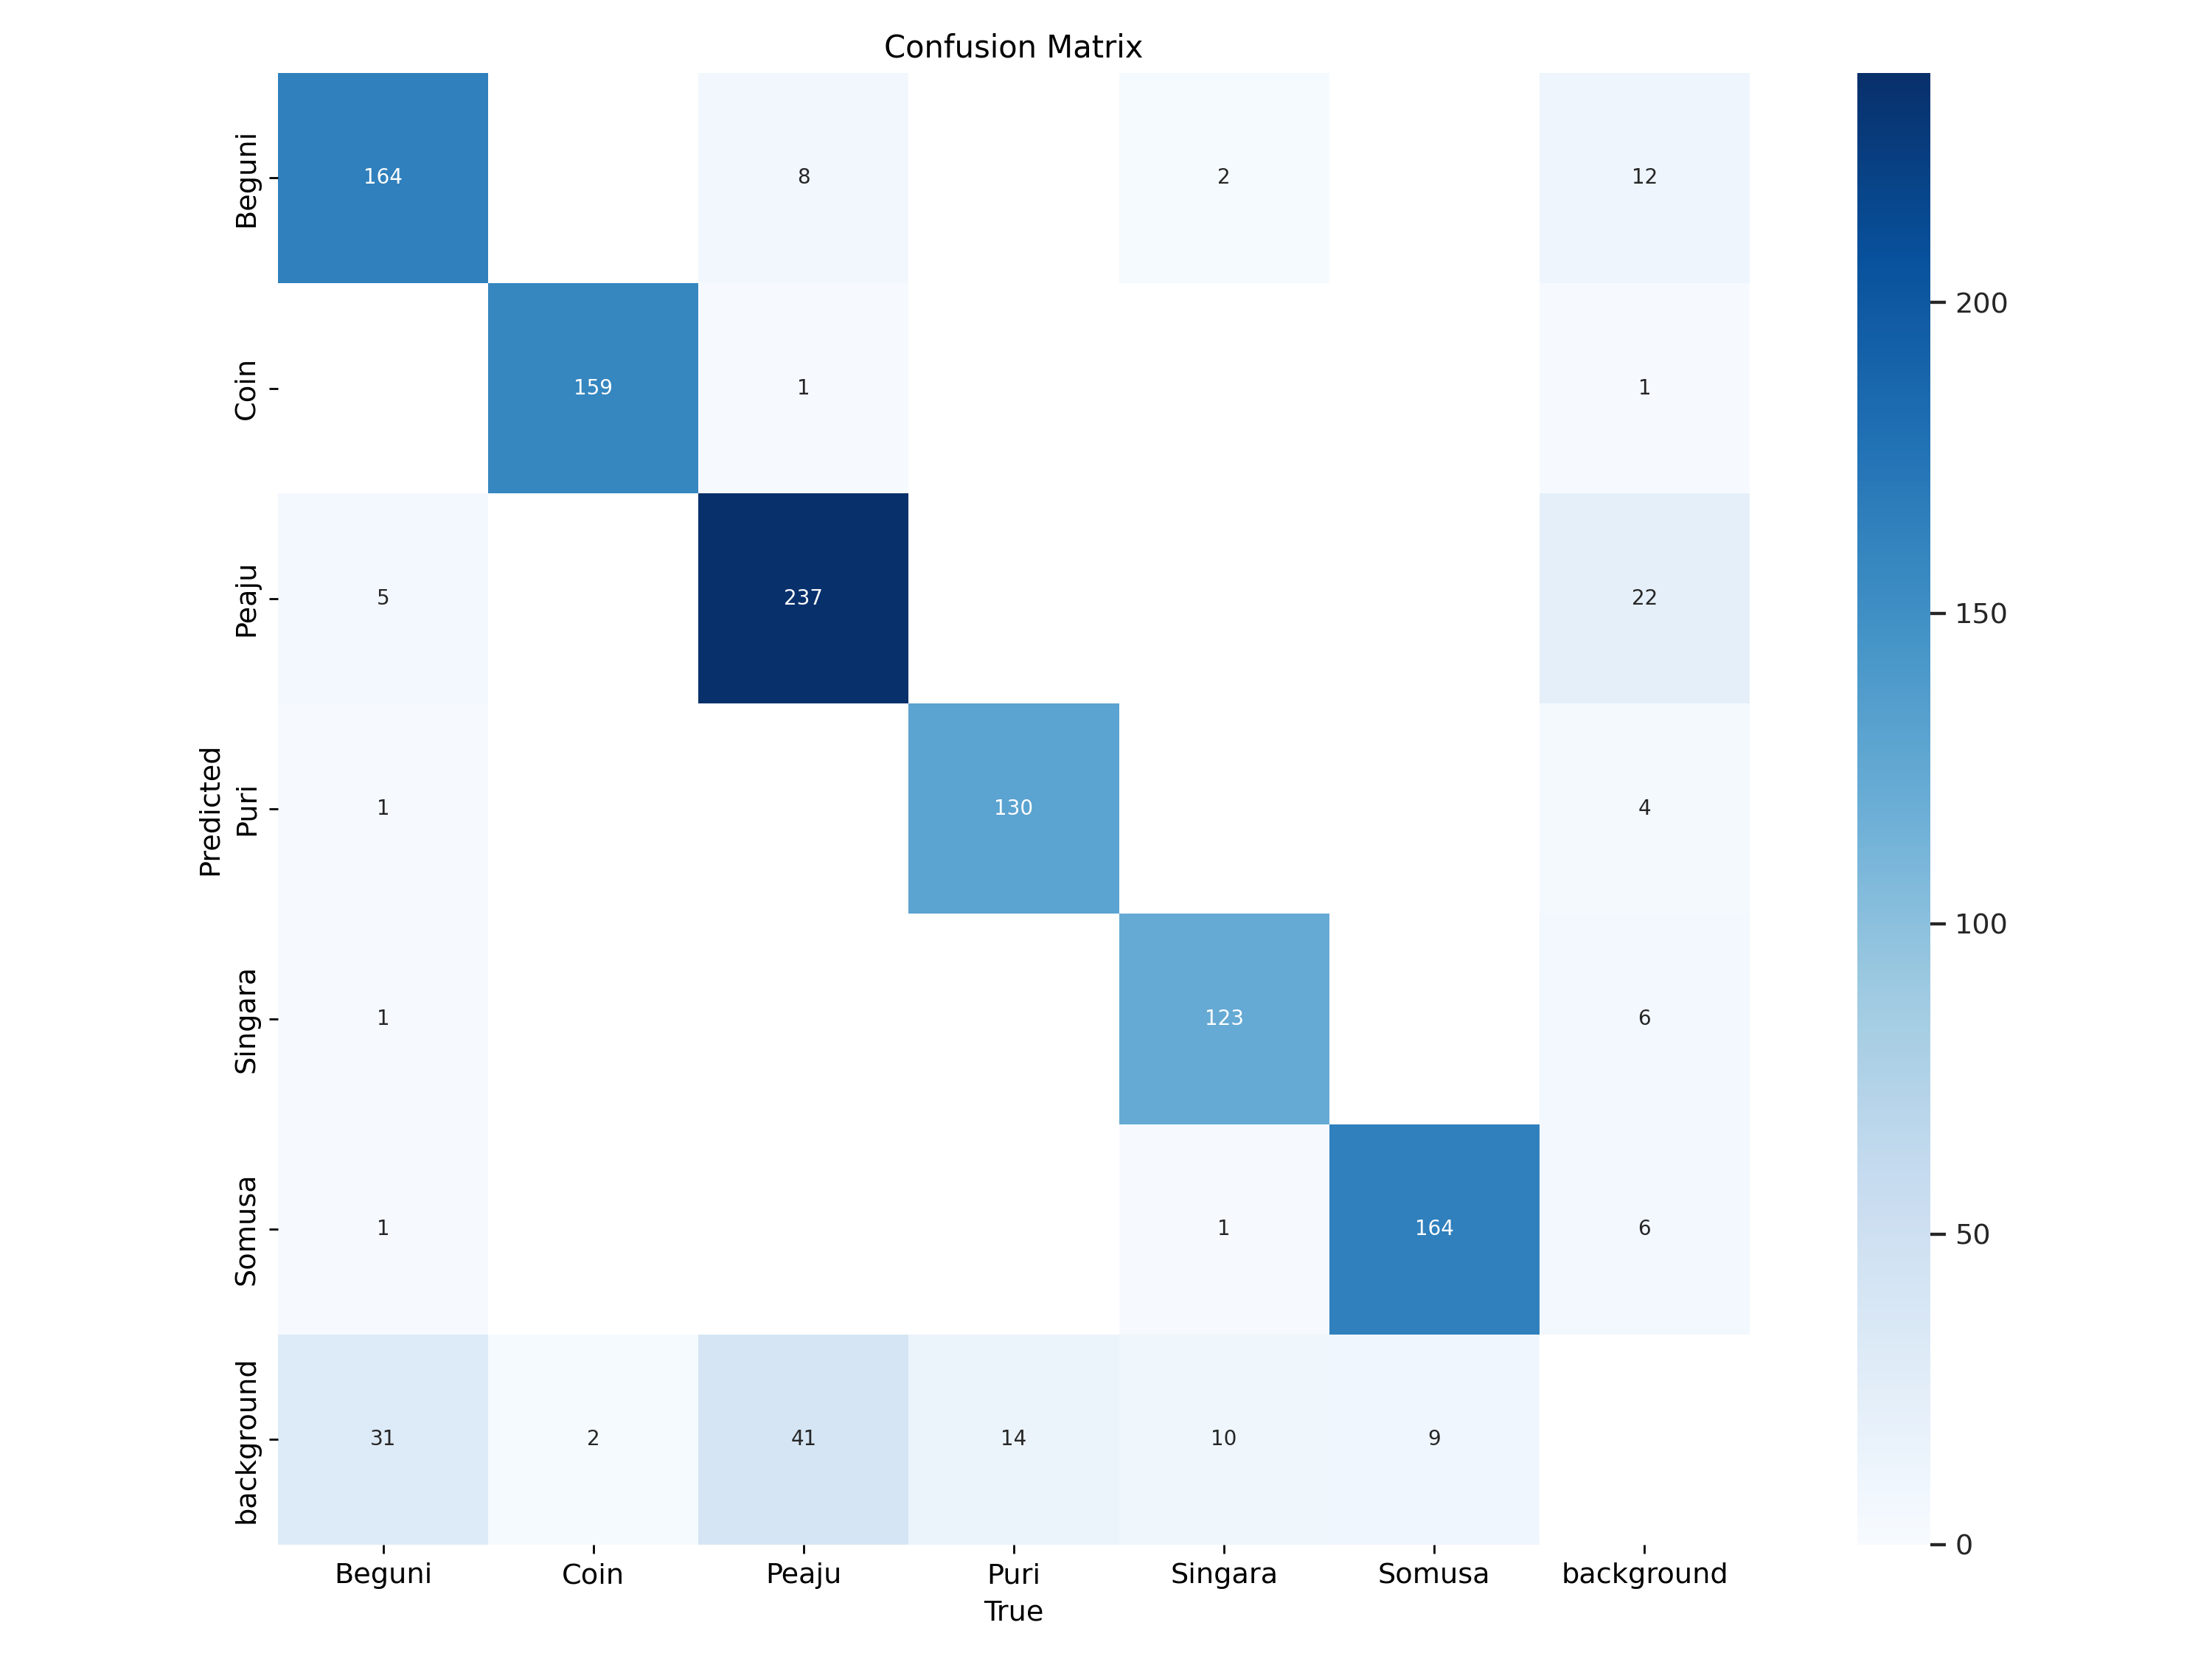

In [9]:
Image(filename=f'/kaggle/working/fork_dcn_yolo/runs/segment/val/confusion_matrix.png', height=500)

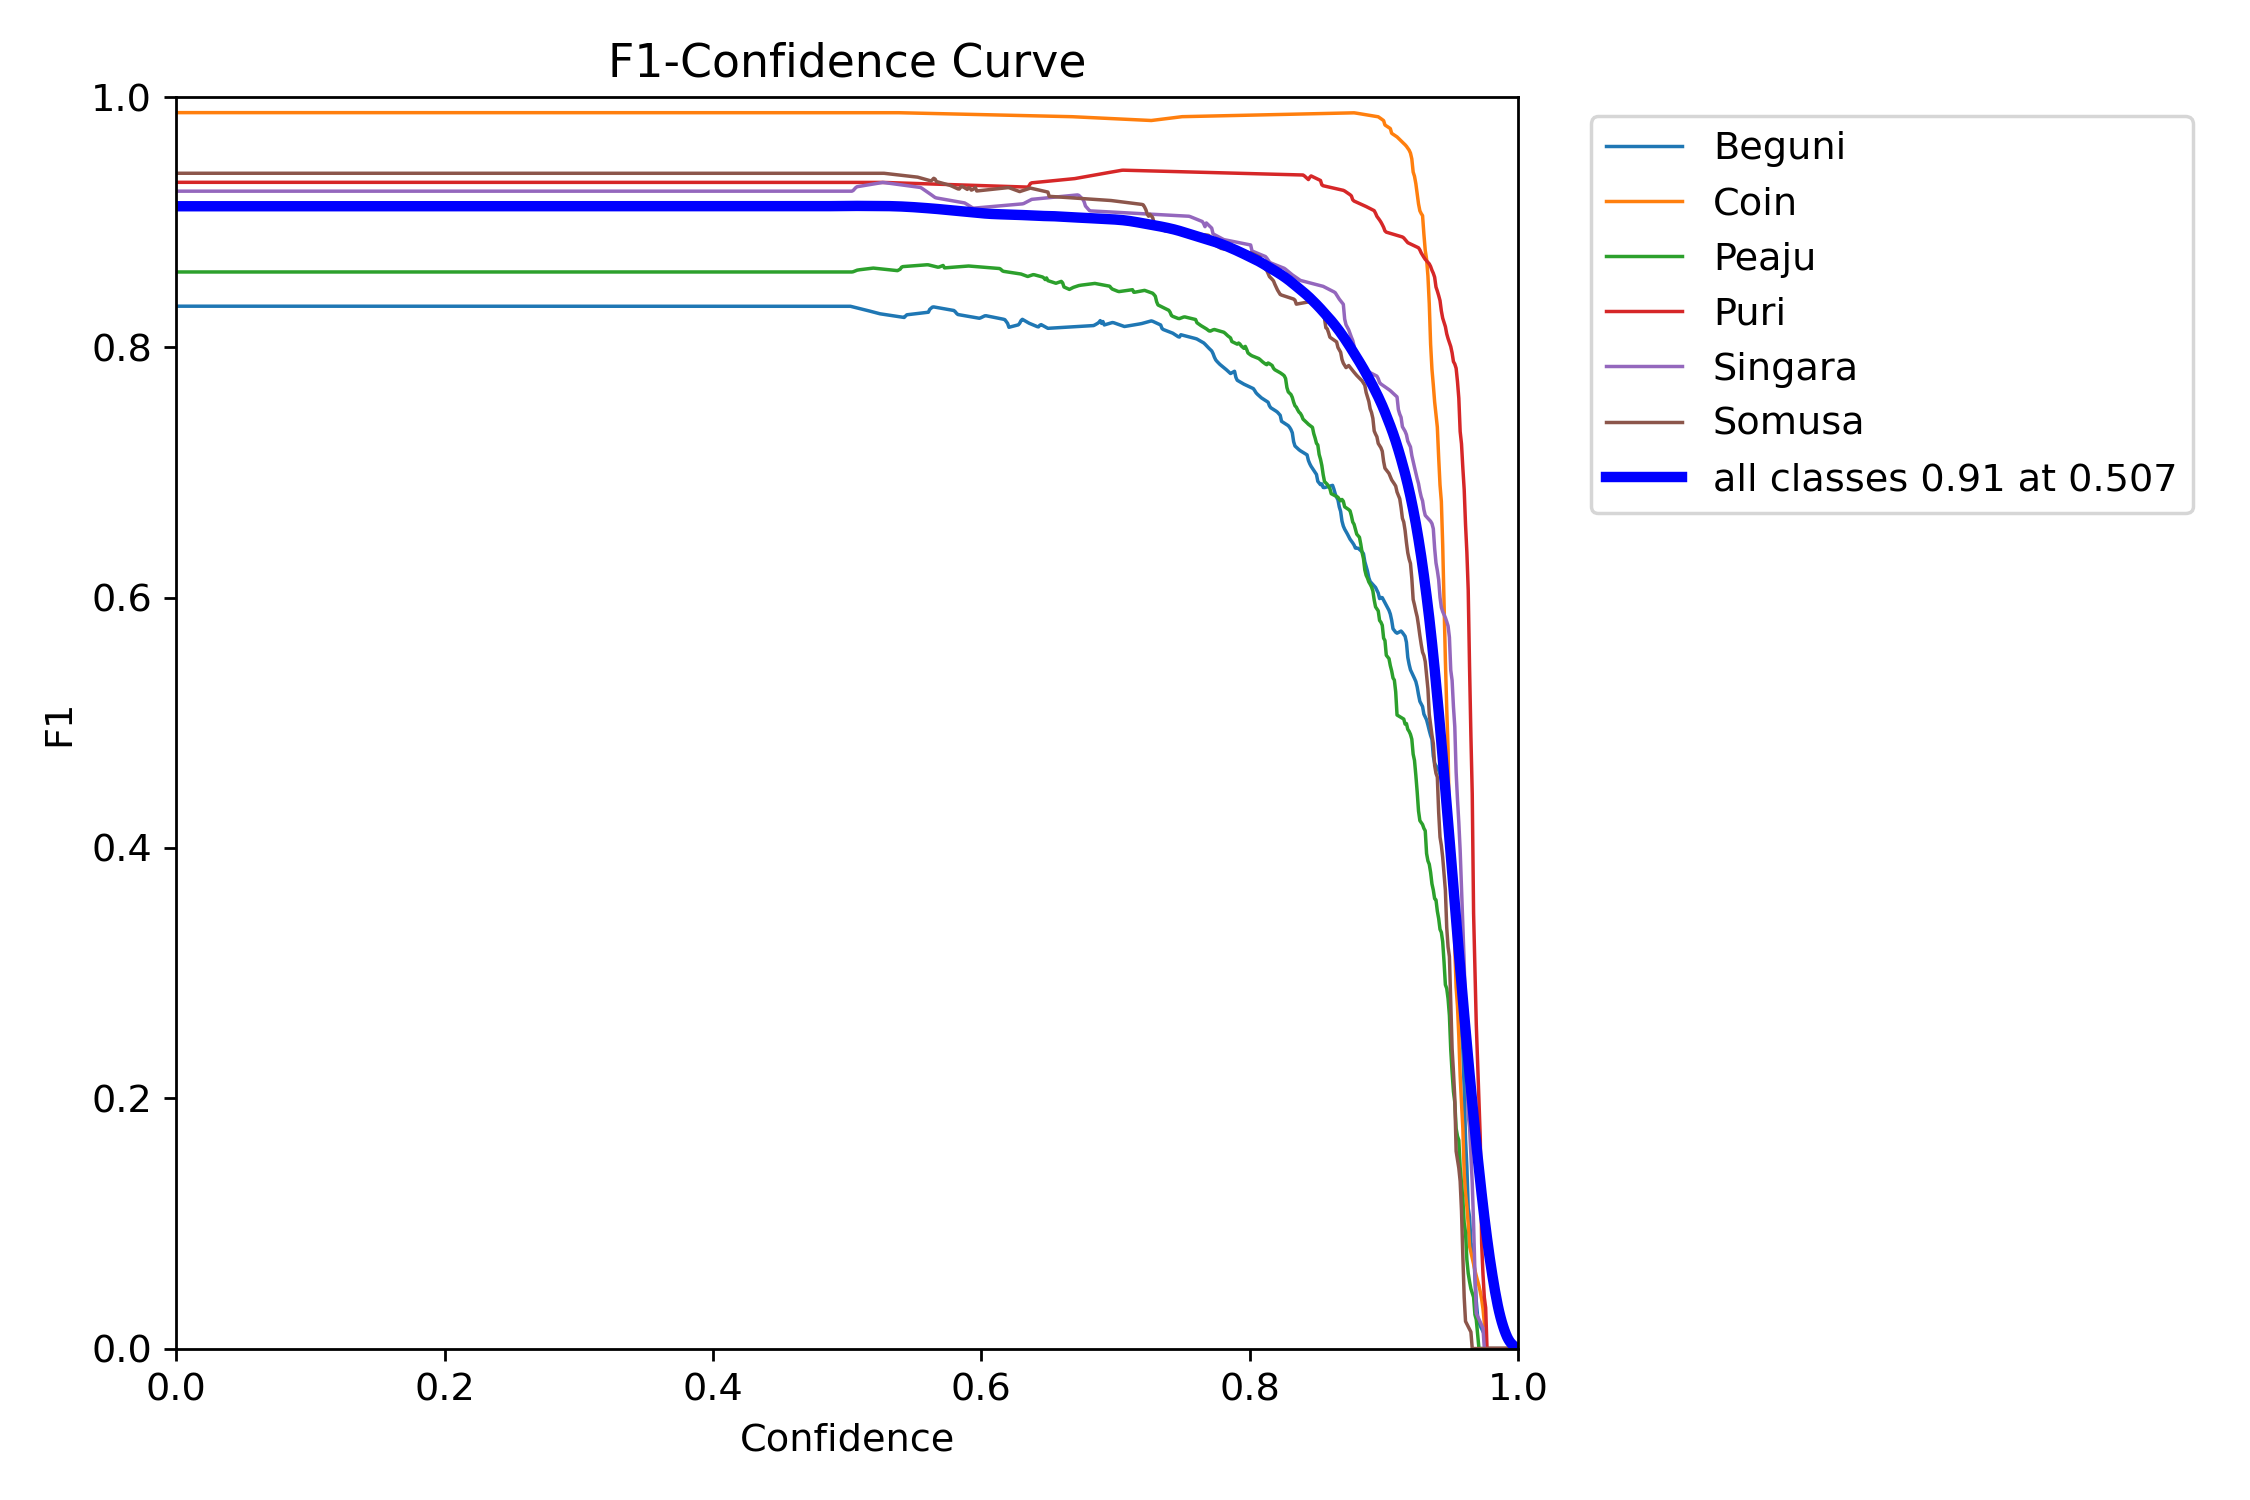

In [10]:
Image(filename=f'/kaggle/working/fork_dcn_yolo/runs/segment/val/BoxF1_curve.png',height=500,width=1000)